In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 

warnings.filterwarnings('ignore')



In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.shape

(244, 7)

In [4]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(243, 7)

In [9]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [10]:
df.describe()

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>, <Axes: >]], dtype=object)

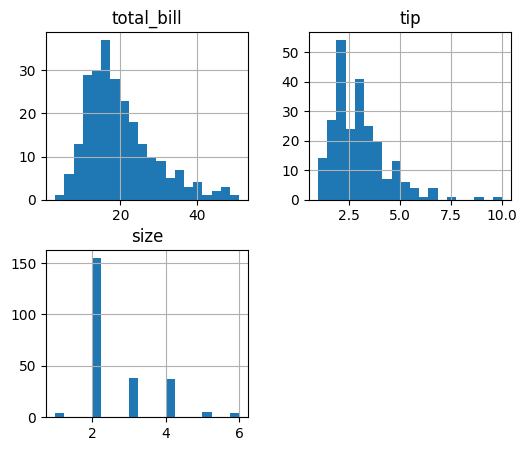

In [11]:
df[['total_bill','tip','size']].hist(bins=20,figsize=(6,5))

**Till here we get that the total bill is majorly between 5-50 . tip is 1-10 . size is 1-6**

In [12]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

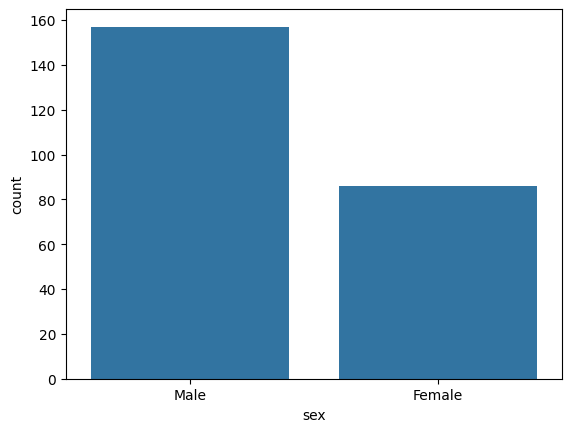

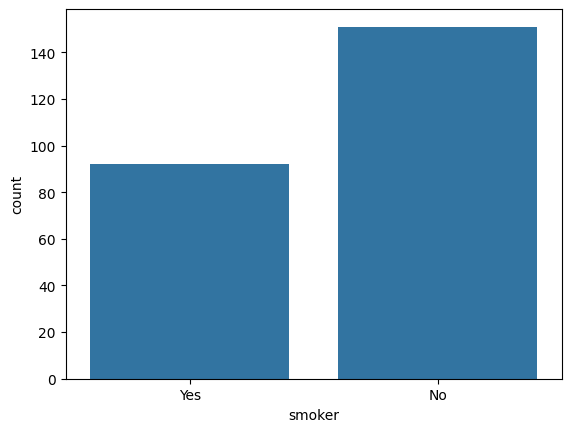

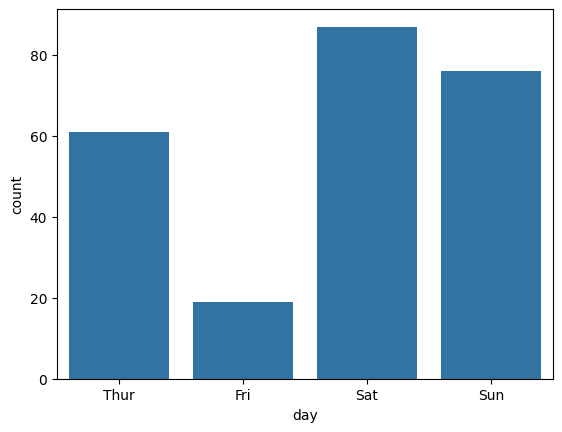

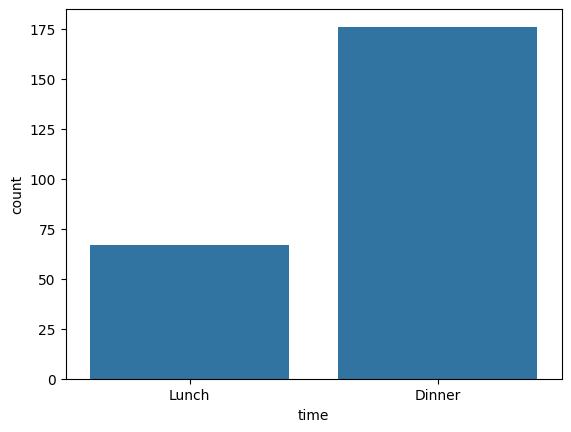

In [13]:
catg_cols=['sex','smoker','day','time']
for col in catg_cols:
    sns.countplot(x = df[col])
    plt.show()

**here we saw that the males are more females are less.
smokers are less .
their is more rush on saturdary and sundary .
more rush is for dinner **

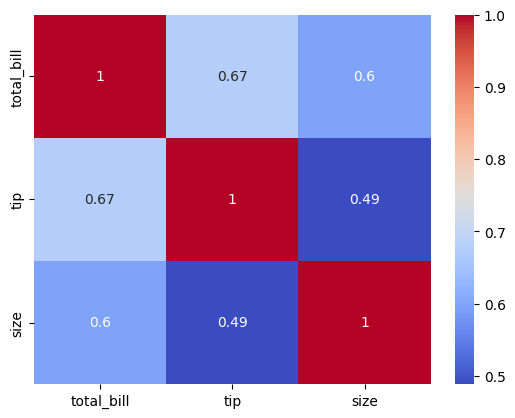

In [14]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

**here we can see tip and size matters for total bill **

<Axes: xlabel='total_bill', ylabel='tip'>

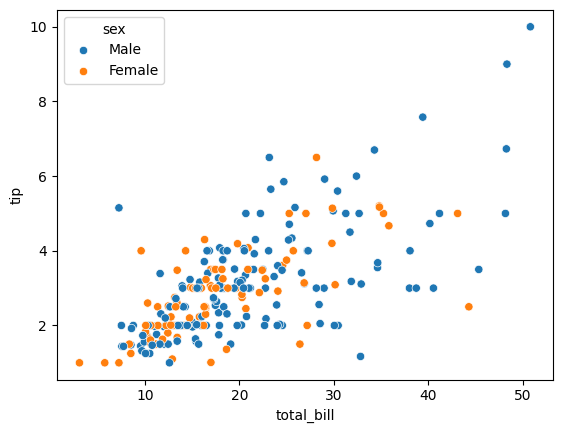

In [15]:
sns.scatterplot(data=df,y='tip',x='total_bill',hue='sex')

**here we can see that moslty mens are paying for the tip and high totolbill has more tip and mostly paid by males**

<Axes: xlabel='smoker', ylabel='tip'>

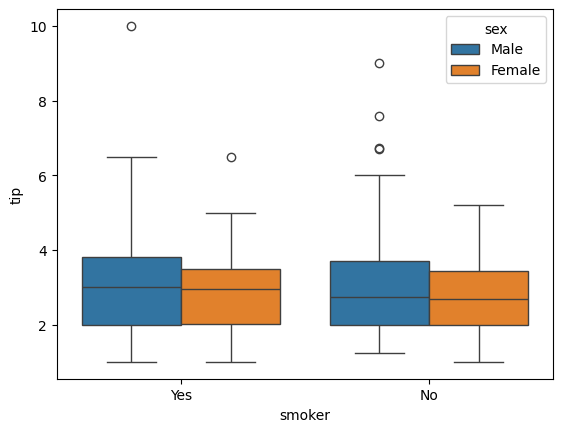

In [16]:
sns.boxplot(data=df,x='smoker',y='tip',hue='sex')

**as i can see that median is similar for both smokers but males are paying more tip**

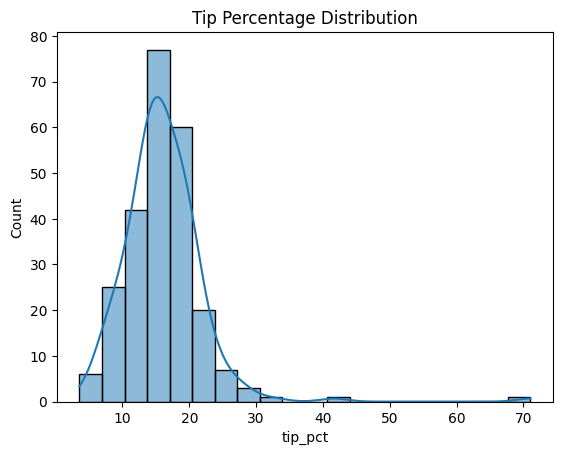

In [17]:
df['tip_pct'] = df['tip'] / df['total_bill'] * 100
sns.histplot(df['tip_pct'], bins=20, kde=True)
plt.title("Tip Percentage Distribution")
plt.show()

**till here we can see that the tip percentage is mostly around 10-20%**

<Axes: xlabel='sex', ylabel='tip_pct'>

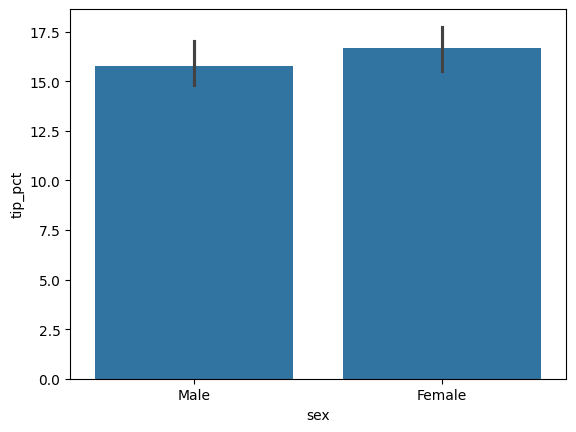

In [18]:
sns.barplot(data=df,x='sex',y='tip_pct')

**tip percentage almost same hai dono ka male and female**

<Axes: xlabel='smoker', ylabel='tip_pct'>

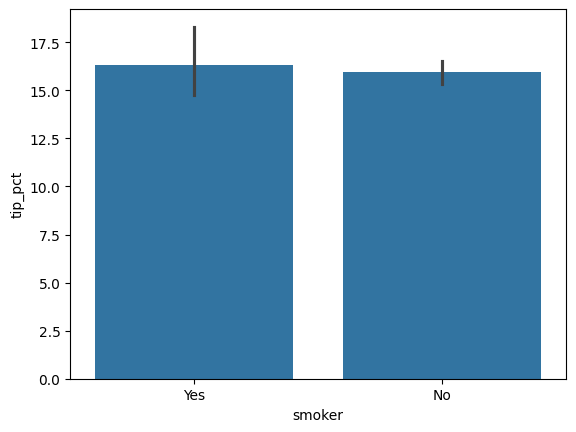

In [19]:
sns.barplot(data=df,x='smoker',y='tip_pct')

**yes smokers have also same tip percentage**

<Axes: xlabel='size', ylabel='count'>

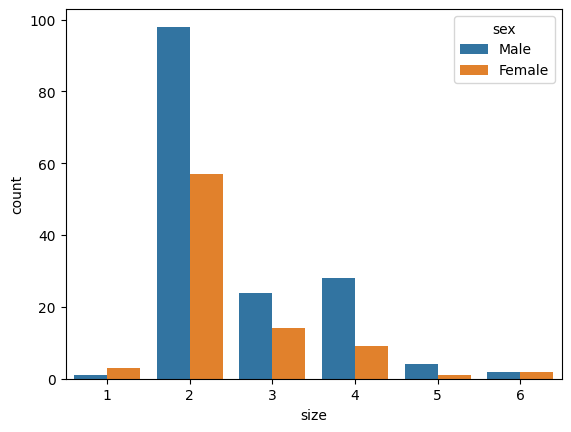

In [20]:
sns.countplot(x=df['size'],hue=df['sex'])

**jda male groups mein hi aate hain**

<Axes: xlabel='time', ylabel='tip_pct'>

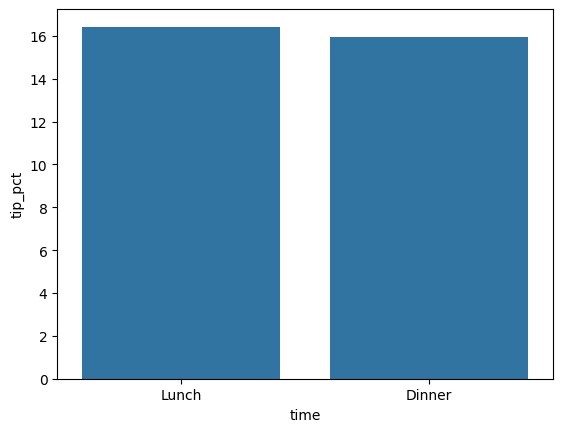

In [21]:
sns.barplot(data=df,x='time',y='tip_pct',estimator=np.mean, ci=None)

In [22]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_pct'], dtype='object')

<Axes: xlabel='day', ylabel='tip_pct'>

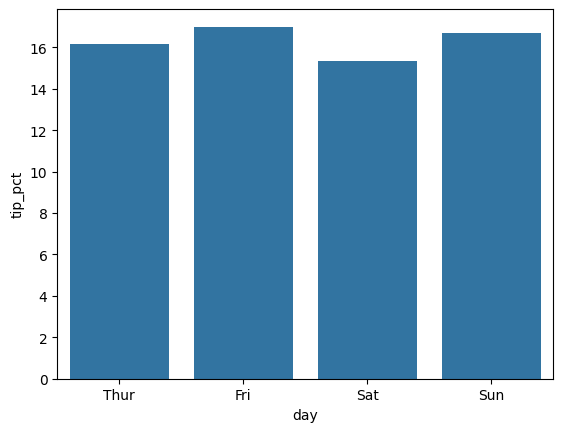

In [23]:
sns.barplot(data=df,x='day',y='tip_pct',estimator=np.mean, ci=None)

**tip matter nhi kr raha day or time ke hissab se sbmein almost equal hi hai percentage**

<Axes: xlabel='size', ylabel='tip_pct'>

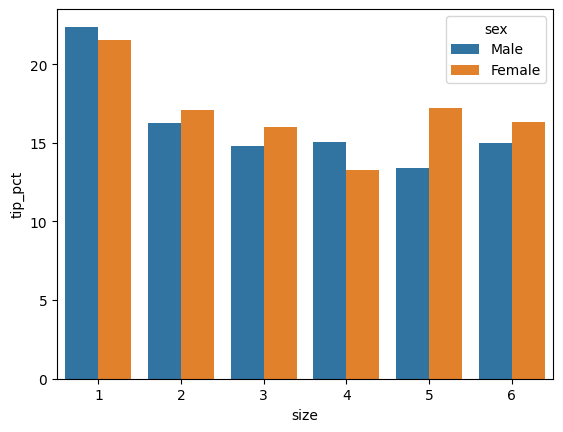

In [24]:
sns.barplot(data=df,x='size',y='tip_pct',hue='sex',estimator=np.mean, ci=None)

**here its showing if a person comes alone then the tip percetange is more or jb female group mein aati hai tb bhi tip jada hai**

<Axes: xlabel='total_bill', ylabel='tip_pct'>

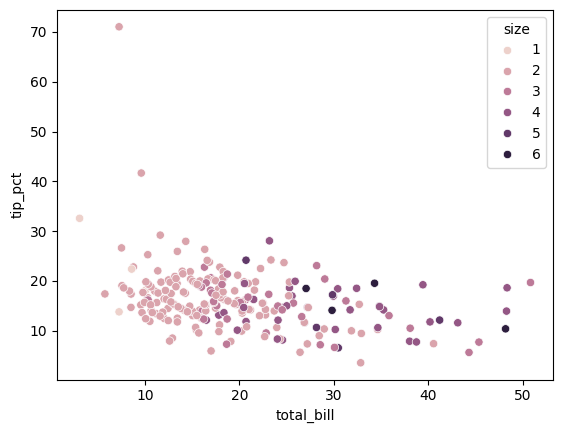

In [25]:
sns.scatterplot(data=df,x='total_bill',y='tip_pct',hue='size')

**large size large total bill and lesser tip**

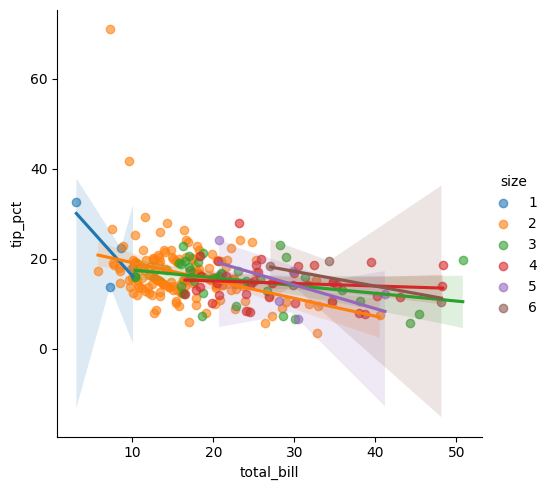

In [26]:
sns.lmplot(x="total_bill", y="tip_pct", data=df, hue="size", scatter_kws={'alpha':0.6})

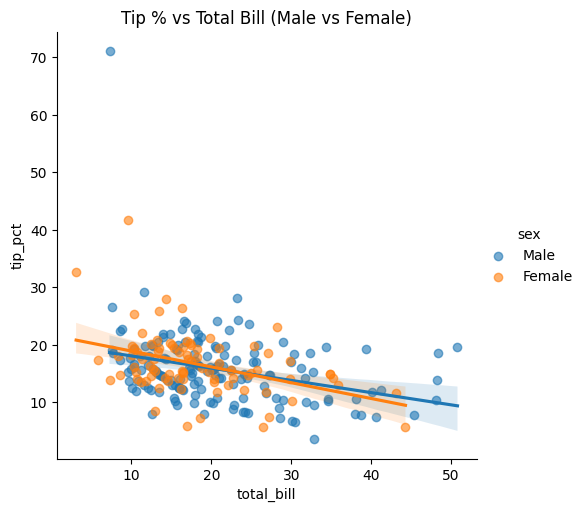

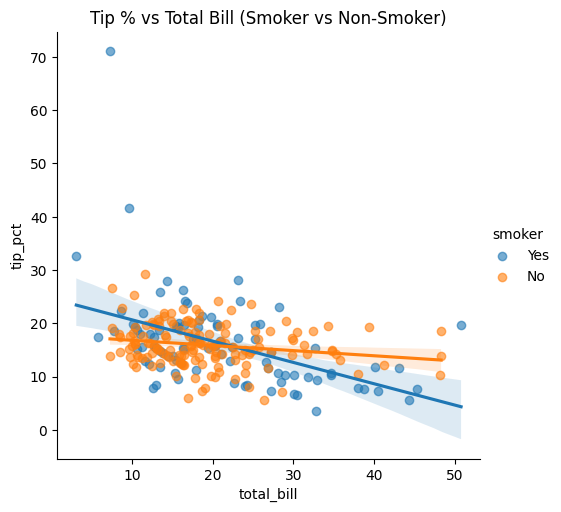

In [27]:
sns.lmplot(x="total_bill", y="tip_pct", data=df, hue="sex", scatter_kws={'alpha':0.6})
plt.title("Tip % vs Total Bill (Male vs Female)")
plt.show()

sns.lmplot(x="total_bill", y="tip_pct", data=df, hue="smoker", scatter_kws={'alpha':0.6})
plt.title("Tip % vs Total Bill (Smoker vs Non-Smoker)")
plt.show()


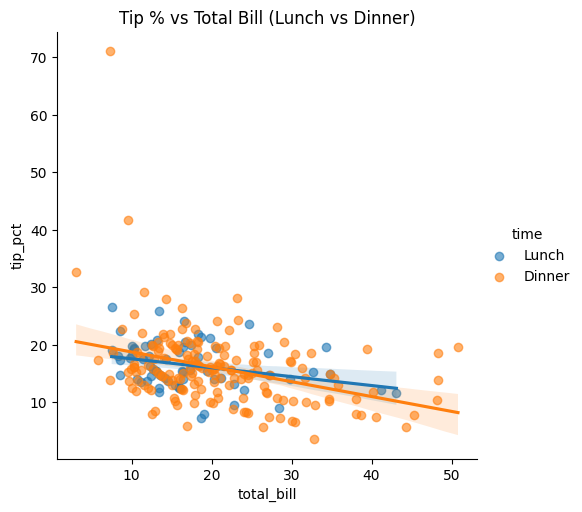

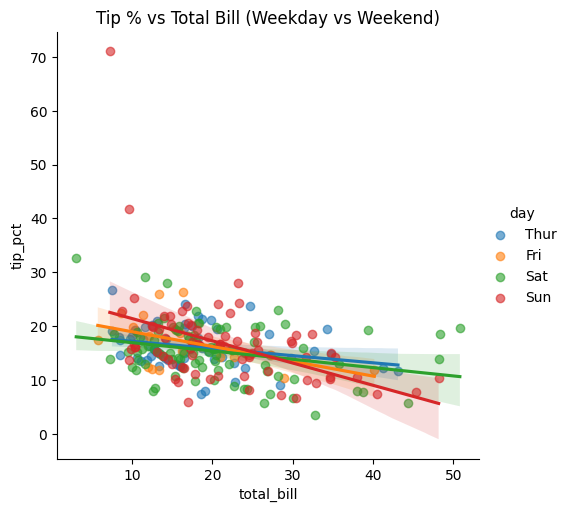

In [28]:
sns.lmplot(x="total_bill", y="tip_pct", data=df, hue="time", scatter_kws={'alpha':0.6})
plt.title("Tip % vs Total Bill (Lunch vs Dinner)")
plt.show()

sns.lmplot(x="total_bill", y="tip_pct", data=df, hue="day", scatter_kws={'alpha':0.6})
plt.title("Tip % vs Total Bill (Weekday vs Weekend)")
plt.show()


**every column has negative correlation with tip_pct**

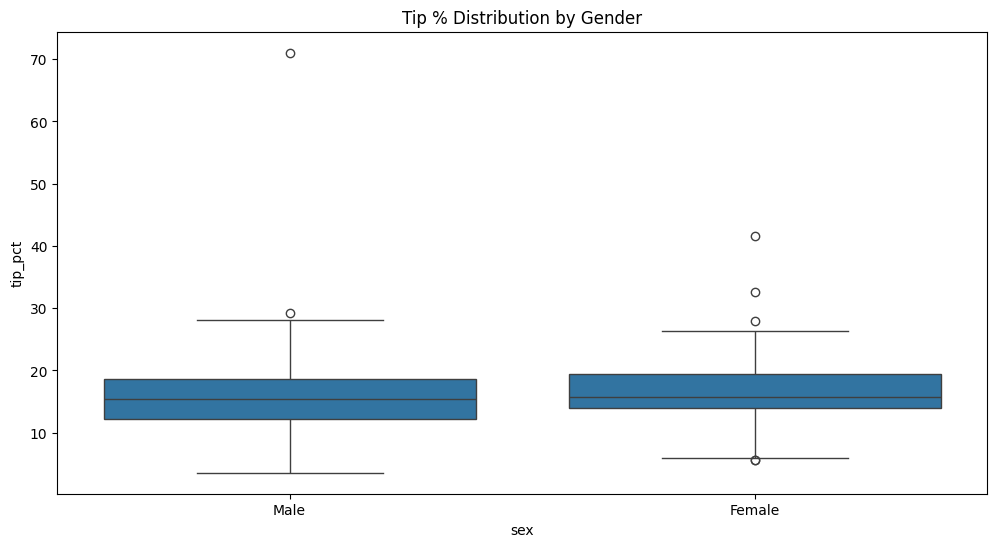

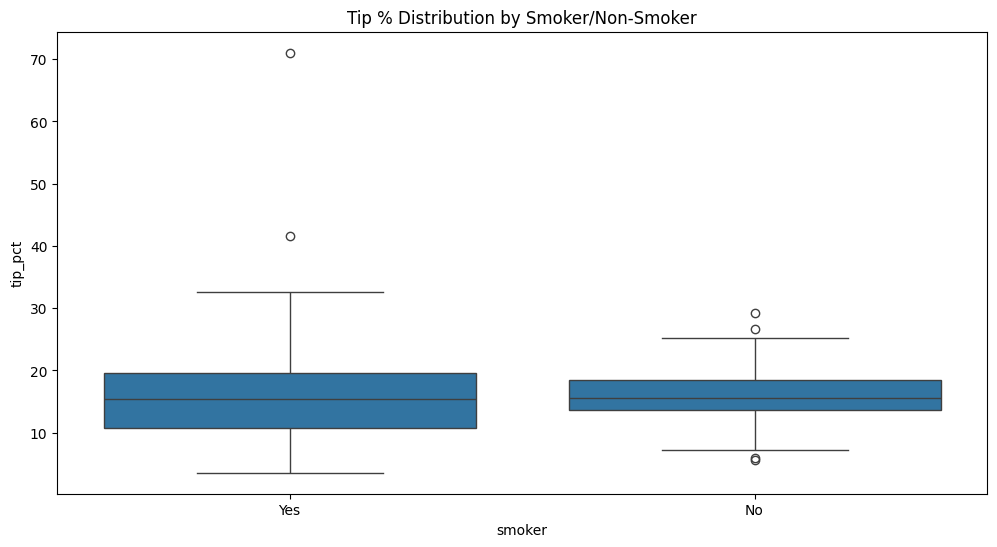

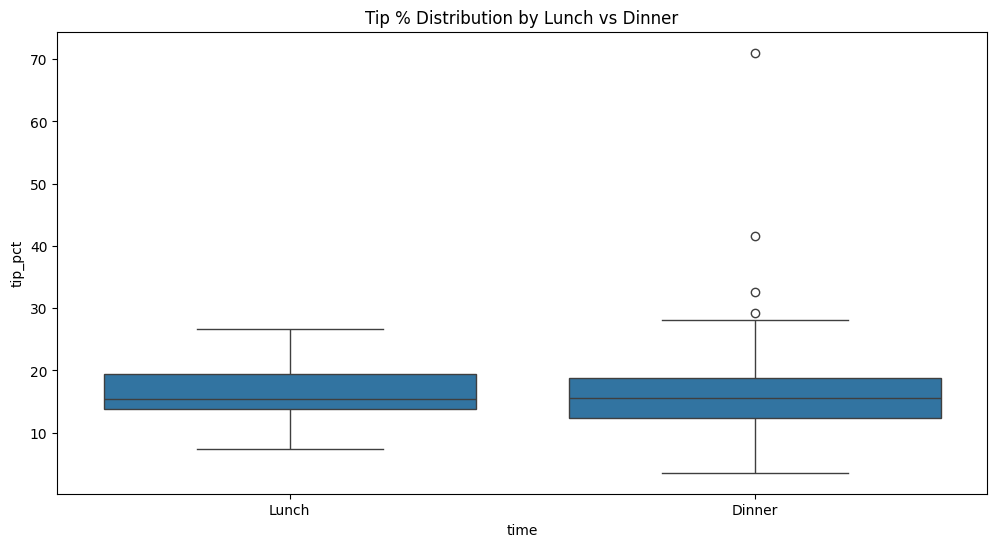

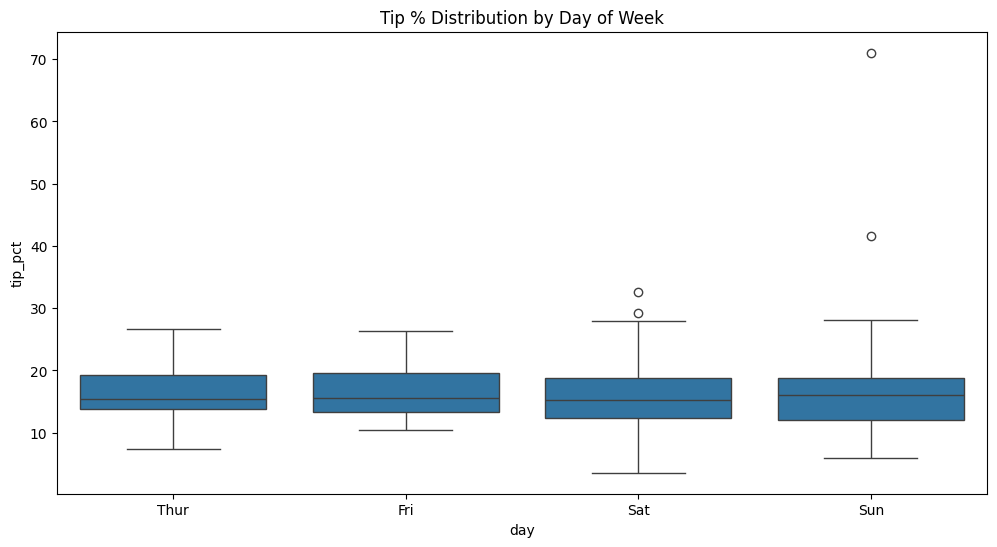

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x="sex", y="tip_pct", data=df)
plt.title("Tip % Distribution by Gender")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="smoker", y="tip_pct", data=df)
plt.title("Tip % Distribution by Smoker/Non-Smoker")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="time", y="tip_pct", data=df)
plt.title("Tip % Distribution by Lunch vs Dinner")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="day", y="tip_pct", data=df)
plt.title("Tip % Distribution by Day of Week")
plt.show()


**sat sunday ko dinner time  acha khada tip percentage hai mtln tip jada**

In [30]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_pct'], dtype='object')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
one_hot_encoded = pd.get_dummies(df,columns=['sex','smoker','day','time'],drop_first=True)

In [33]:
one_hot_encoded

,total_bill,tip,size,tip_pct,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,5.944673,True,True,False,False,True,True
1,10.34,1.66,3,16.054159,False,True,False,False,True,True
2,21.01,3.50,3,16.658734,False,True,False,False,True,True
3,23.68,3.31,2,13.978041,False,True,False,False,True,True
4,24.59,3.61,4,14.680765,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,20.392697,False,True,False,True,False,True
240,27.18,2.00,2,7.358352,True,False,False,True,False,True
241,22.67,2.00,2,8.822232,False,False,False,True,False,True
242,17.82,1.75,2,9.820426,False,True,False,True,False,True


In [91]:
X=one_hot_encoded.drop(columns=['total_bill'])
y=one_hot_encoded['total_bill']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [93]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [94]:
y_predict = lr_model.predict(X_test)

In [95]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


In [96]:
print(r2_train,r2_test)

0.8351736484650907 0.8877874275083493


In [97]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)
coeff_df


,Feature,Coefficient
0,tip,5.380967
8,time_Dinner,1.295705
1,size,1.167091
3,sex_Female,0.065706
7,day_Sun,-0.051216
2,tip_pct,-0.861882
5,day_Fri,-0.981602
6,day_Sat,-1.043037
4,smoker_No,-2.031703


In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:", round(mean_absolute_error(y_test, y_test_pred),2))
print("MSE:", round(mean_squared_error(y_test, y_test_pred),2))


MAE: 2.05
MSE: 10.09
